# Plotting Fifa 2019 Player Data Set

Use markdown cells to create headers and to answer the questions listed below. notebook is clear and well organized.

● Load dataset with read_csv(filename, index_col=0). use the first column as the index.

● Using describe() and info(), to find the following information:
>○ Average age of the players

>○ The name of the oldest player

>○ The highest salary (You will need to convert string to int for these, consider using the strip()method, then casting it as an int)
    
● Create histogram. You may need to standardize values to help with clarity. Provide description of insights that you’ve gleaned from this visualization.

● Create a correlation matrix with df.corr() and save the output to a dataframe.
>○ List a few positive & negative correlations and provide some reasoning to why this correlation makes sense. If it doesn’t, 
>○ Briefly state which columns you would use as inputs and targets, and why.

● Plot correlation matrix to create heatmap. use any visualization tool, but try with seaborn. You can try sns.heatmap(df_corr)

● Create two other visualizations for fields that are correlated. You can create figures such as scatter plots, bar charts, or line charts.
> ○ Label the axis for each figure

> ○ Title each figure

>○ Optional: Can you create a visualization that captures 3 fields of information?
    
● no single correct answer or exact way to implement the procedure above

In [1]:
import pandas as pd

df = pd.read_csv("fifaData.csv", index_col=0)
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


## Fifa 2019 Age

- Average (Mean) **Age**: 25
- Oldest (Max) **Age**: 45
- Oldest Player: O. Pérez
- Highest Salary (**Wage**): €565K
- Highest Paid Player: L. Messi

In [2]:
df.Age.describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [3]:
#Oldest Age of player

df.Name[df.Age == 45]
#df.Name[df.Age == df.Age.max()] yields same results

4741    O. Pérez
Name: Name, dtype: object

In [4]:
# Preprocessing df.Wage to numerical format 

for index in df.index:
    df.loc[index,'Wage'] = int(df.loc[index,'Wage'].strip("€K"))
df.Wage = df.Wage.astype(int)

df.Wage.describe()


count    18207.000000
mean         9.731312
std         21.999290
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage, dtype: float64

In [5]:
#Highest paid Player

df.Name[df.Wage == 565]

#df.Name[df.Wage == df.Wage.max()] yields same results

0    L. Messi
Name: Name, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  int32  
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

## Histogram on the Age Distribution of Fifa 2019 Players

- Most fifa 2019 players are in their 20s

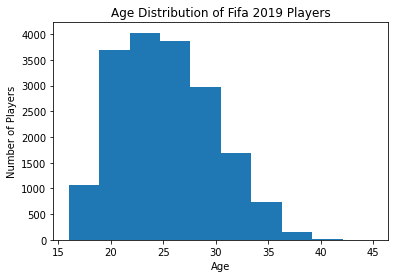

In [7]:
import matplotlib.pyplot as plt

#age distribution of players
df.Age.plot.hist()

plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.title("Age Distribution of Fifa 2019 Players")
plt.show()


In [8]:
df_corr = df.corr()
df_corr

,ID,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.204610,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.141145,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.571926,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.486413,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Wage,-0.204610,0.141145,0.571926,0.486413,1.000000,0.347835,0.668635,0.140849,0.263205,-0.086561,...,0.222440,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992
Special,-0.231352,0.236695,0.606960,0.383727,0.347835,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.668635,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.140849,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.263205,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.086561,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


## Correlation matrix in Heatmap

### Negative Correlations:
- Values such as **Jersey Number** and **ID**; they are values given to players for identification purposes, and do not correspond to anything.
-GK(Goalkeeper) values are negatively correlated to all other non GK skill based values because goalkeeping uses a different skillset than the other soccer positions.

### Positive Correlations:
- GK skills to one another

<AxesSubplot:>

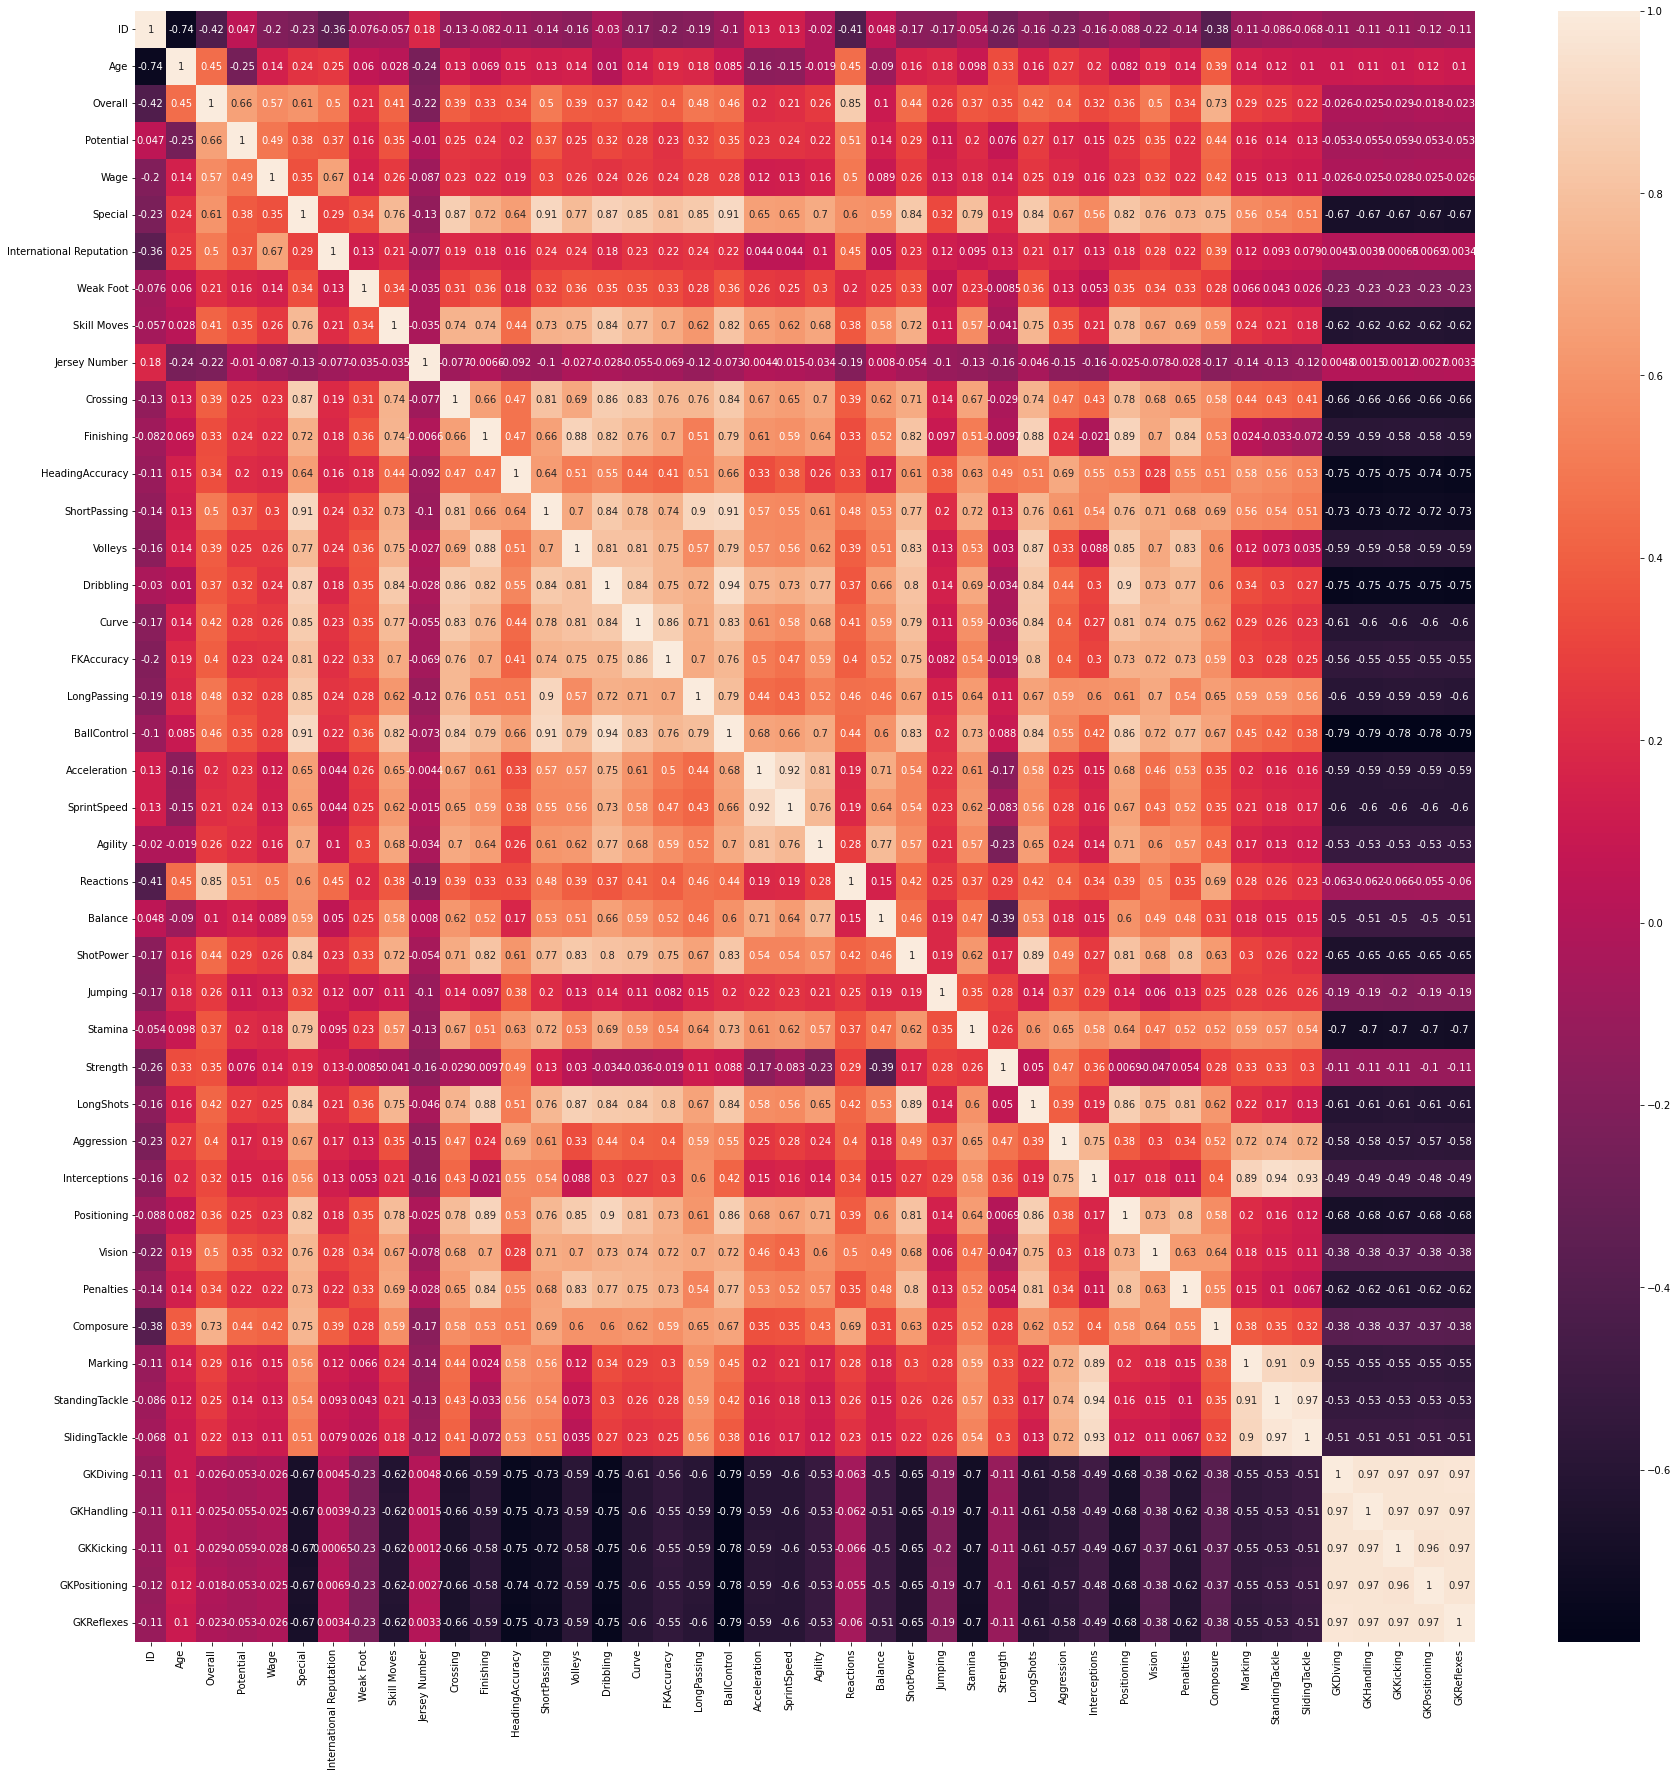

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(df_corr, annot=True)

## Scatter Plot on the Wage of Fifa 2019 Players

- There is a strong correlation between the **Potential** and the **Wage** of Players
- The higher the player's **Potential**, the increase in probability for higher **Wage**

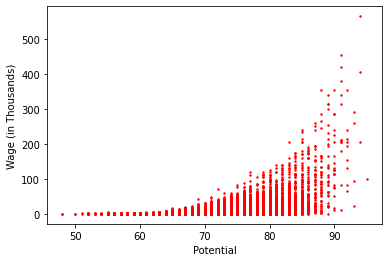

In [10]:
plt.scatter(x=df.Potential, y=df.Wage, s=2, color="red")

plt.xlabel("Potential")
plt.ylabel("Wage (in Thousands)")
plt.show()

## All About Goalkeepers
- New column **GK** is created to represent the average value of GK skills (**GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes**)
- Based on highest paid players vs highest **GK** players, goalkeepers are undervalued

In [11]:
df["GK"] = df[["GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]].mean(axis=1)


- Top 15 players with highest average Goalkeeping skill
- The top 13 are included in the [EverybodySoccer list of Best Goalkeepers of 2019](https://everybodysoccer.com/even-the-goalkeepers-like-to/2019/6/17/the-worlds-top-goalkeepers-2019)

In [12]:
#Top 15 players with the highest GK value

df = df.sort_values(by="GK", ascending=False)
df[["Name", "GK", "Wage"]].head(15)


,Name,GK,Wage
3,De Gea,88.8,260
22,M. Neuer,88.2,130
18,M. ter Stegen,87.0,240
9,J. Oblak,86.6,94
57,Ederson,85.0,125
19,T. Courtois,84.4,240
41,G. Buffon,84.4,77
81,Alisson,84.2,115
40,S. Handanovič,84.0,110
46,K. Navas,83.6,195


- Top 20 highest paid players do not include a single member of the top 15 goalkeepers
- Conclusion: Goalkeepers are undervalued

In [13]:
#Top 20 highest paid players

df = df.sort_values(by="Wage", ascending=False)
df[["Name", "GK", "Wage"]].head(20)


,Name,GK,Wage
0,L. Messi,10.8,565
7,L. Suárez,30.6,455
6,L. Modrić,10.4,420
1,Cristiano Ronaldo,11.6,405
8,Sergio Ramos,9.2,380
4,K. De Bruyne,11.2,355
36,G. Bale,10.4,355
11,T. Kroos,10.2,355
5,E. Hazard,9.0,340
32,Coutinho,9.6,340


## Player Nationality
- England is the most represented Nationality (9.3%) out of 164 Nationalities

In [49]:
df.Nationality.value_counts()

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
               ... 
Rwanda            1
Guam              1
Liberia           1
Grenada           1
South Sudan       1
Name: Nationality, Length: 164, dtype: int64

### Pie Chart for Distribution of top 15 Nationalities Represented

array([<AxesSubplot:ylabel='Nationality'>], dtype=object)

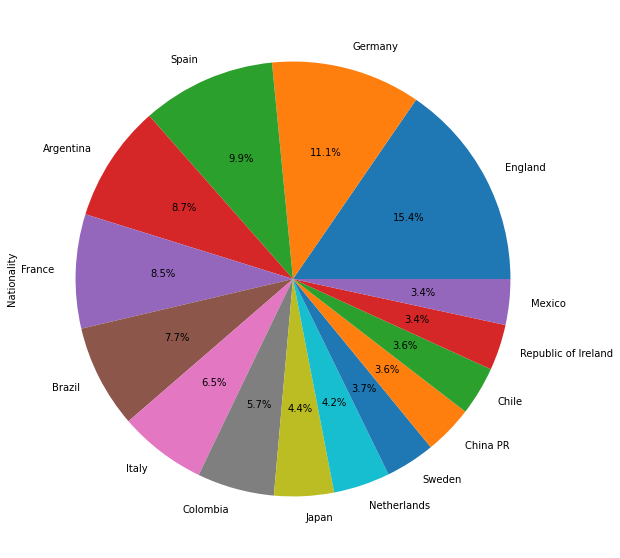

In [45]:
#Plotting the Nationality of players with the top 15 highest value counts

df.Nationality.value_counts().head(15).plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.1f%%')

### Pie Chart for Distribution of top 15 + All Other Nationalities Represented

<AxesSubplot:ylabel='Nationality'>

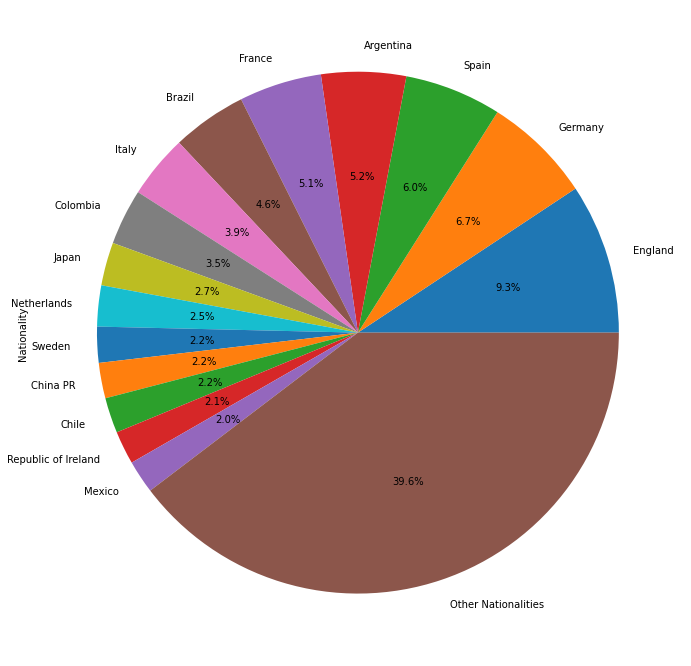

In [46]:
#New Dataframe created for the purpose of storing nationality and value counts

df_nationalities = df.Nationality.value_counts().head(15).copy()

#New category to specifically store nationalities below the top 15

df_nationalities["Other Nationalities"] = df.Nationality.value_counts()[16:].sum()
df_nationalities.plot(kind="pie", autopct='%1.1f%%', figsize=(15,12))
